In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

voila 0.2.3 requires nbconvert<7,>=6.0.0, but you'll have nbconvert 5.6.1 which is incompatible.


In [28]:
key = os.environ.get('AZURE_SEARCH_KEY', '7d3090f0164e4dd8a3e97835f48cfe50')

In [29]:
objects = 'sun', 'moon', 'earth', 'mercury planet', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto'
path = Path('objects')

In [30]:
if not path.exists():
    path.mkdir()
    for o in objects:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('content_url'))


 Download of http://www.onewater.my/images/blog/earth-water-cycle.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p objects/earth
$ cd objects/earth
$ wget -c http://www.onewater.my/images/blog/earth-water-cycle.jpg
$ tar xf earth-water-cycle.jpg
 And re-run your code once the download is successful




 Download of https://rnrautoblog.files.wordpress.com/2015/01/saturn-20.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p objects/saturn
$ cd objects/saturn
$ wget -c https://rnrautoblog.files.wordpress.com/2015/01/saturn-20.jpg
$ tar xf saturn-20.jpg
 And re-run your code once the download is successful




 Download of https://bluejayblog.files.wordpress.com/2015/02/uranus-01nasafindings.jpg?w=640 has failed after 5 retries
 Fix the download manually:
$ mkdir -p objects/uranus
$ cd objects/uranus
$ wget -c https://bluejayblog.files.wordpress.com/2015/02/uranus-01nasafindings.jpg?w=640
$ tar xf uranus-01nasafindings.jpg?w=640
 And re-run your code once the download is successful




 Download of https://danacphotography.files.wordpress.com/2010/09/king-neptune-statue.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p objects/neptune
$ cd objects/neptune
$ wget -c https://danacphotography.files.wordpress.com/2010/09/king-neptune-statue.jpg
$ tar xf king-neptune-statue.jpg
 And re-run your code once the download is successful



In [31]:
fns = get_image_files(path)
fns

(#1637) [Path('objects/sun/00000004.jpg'),Path('objects/sun/00000002.jpeg'),Path('objects/sun/00000007.jpg'),Path('objects/sun/00000001.jpg'),Path('objects/sun/00000003.jpg'),Path('objects/sun/00000005.jpg'),Path('objects/sun/00000006.jpg'),Path('objects/sun/00000008.jpg'),Path('objects/sun/00000009.jpg'),Path('objects/sun/00000010.jpg')...]

In [32]:
failed = verify_images(fns)
failed

(#52) [Path('objects/moon/00000031.jpg'),Path('objects/moon/00000052.jpg'),Path('objects/moon/00000110.jpg'),Path('objects/earth/00000040.png'),Path('objects/earth/00000043.jpg'),Path('objects/earth/00000067.jpg'),Path('objects/earth/00000101.jpg'),Path('objects/mercury planet/00000003.jpg'),Path('objects/mercury planet/00000041.jpg'),Path('objects/mercury planet/00000042.jpg')...]

In [33]:
failed.map(Path.unlink);

In [63]:
objects = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [64]:
dls = objects.dataloaders(path)

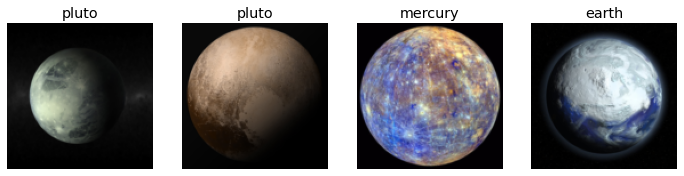

In [65]:
dls.valid.show_batch(max_n=4, nrows=1)

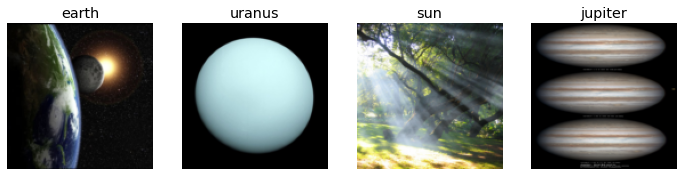

In [38]:
objects = objects.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = objects.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

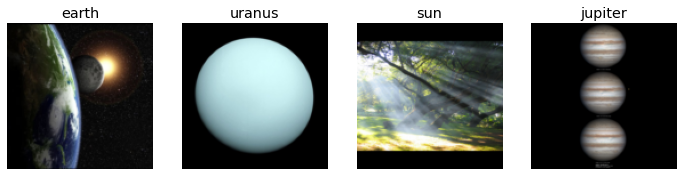

In [39]:
objects = objects.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = objects.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

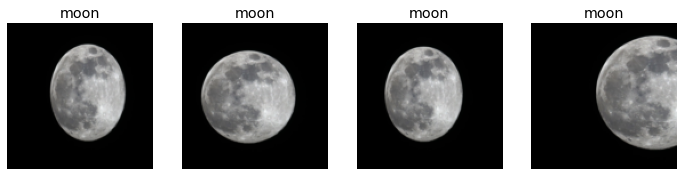

In [40]:
objects = objects.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = objects.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Data Augmentation

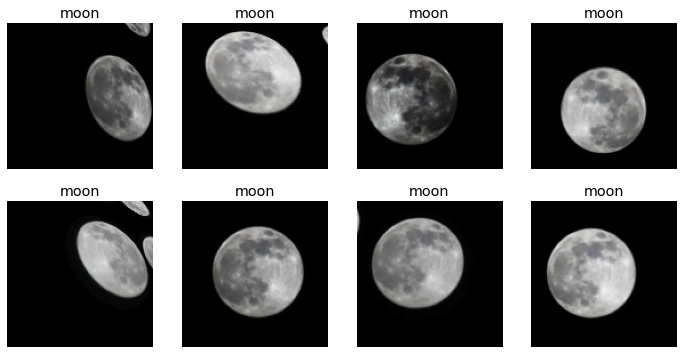

In [41]:
objects = objects.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = objects.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Training

In [66]:
objects = objects.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = objects.dataloaders(path)

In [67]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.738045,1.116325,0.304636,00:18


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.373973,0.943936,0.281457,00:16
1,1.215535,0.849599,0.251656,00:18
2,1.067090,0.745664,0.215232,00:16
3,0.907784,0.706397,0.205298,00:18
4,0.787134,0.708749,0.218543,00:17
5,0.668547,0.684443,0.195364,00:18
6,0.589112,0.671643,0.188742,00:17
7,0.494485,0.684941,0.178808,00:17
8,0.405119,0.667852,0.178808,00:16
9,0.346690,0.702083,0.188742,00:17


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: U

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: U

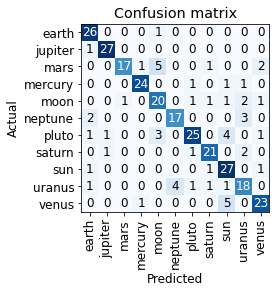

In [68]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

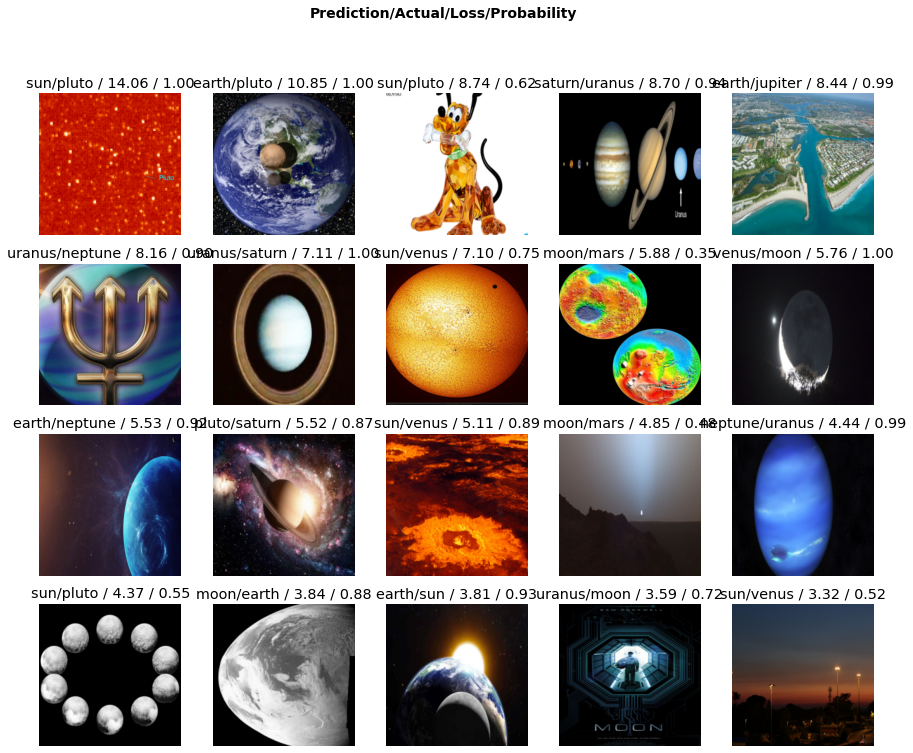

In [69]:
interp.plot_top_losses(20, nrows=4)

In [70]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [61]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [71]:
learn.export('/notebooks/mybook/models/solarsys.pkl')

In [72]:
learn_inf = load_learner('/notebooks/mybook/models/solarsys.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')